# Model-1

In [67]:
dfff = pd.read_csv(r"pgm_pro_final_for_our.csv")

In [68]:
dfff.columns

Index(['Unnamed: 0', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'RainTomorrow', 'WindSpeed', 'Humidity', 'Pressure',
       'Cloud', 'Season'],
      dtype='object')

In [69]:
dfff.drop('Unnamed: 0',axis=1,inplace=True)

In [70]:
dfff.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Season
0,1.0,3.0,1.0,1.0,2.0,1,0.0,1.0,0.0,1.0,3
1,1.0,3.0,1.0,1.0,2.0,1,0.0,0.0,0.0,0.0,3
2,1.0,3.0,1.0,1.0,2.0,1,0.0,0.0,0.0,0.0,3
3,1.0,3.0,1.0,1.0,2.0,1,0.0,0.0,1.0,0.0,3
4,3.0,2.0,1.0,1.0,2.0,1,0.0,1.0,0.0,0.0,3


In [71]:
dfff.shape

(142193, 11)

In [72]:
X_train_1, X_test_1= train_test_split(
    dfff, test_size=0.25, random_state=0)

In [73]:
X_train.shape

(106644, 20)

In [74]:
X_test.shape

(35549, 20)

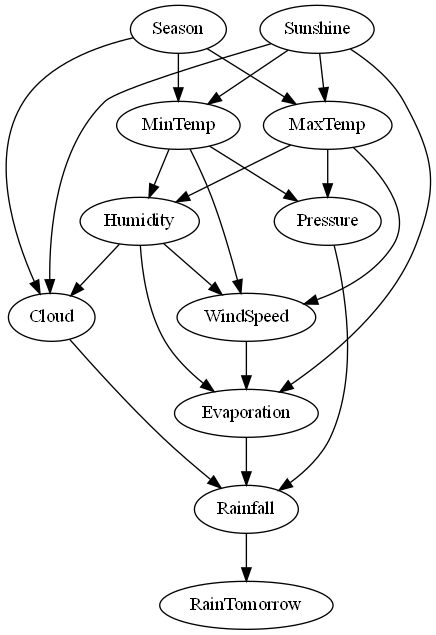

In [76]:
model_our = BayesianNetwork([('Sunshine','Evaporation'),
                          ('Sunshine','Cloud'),                               
                          ('Sunshine','MinTemp'),
                          ('Sunshine','MaxTemp'),
                          ('Season','MaxTemp'),
                          ('Season','MinTemp'),
                          ('Season','Cloud'),
                          ('MinTemp','Humidity'),
                          ('MinTemp','Pressure'),
                          ('MinTemp','WindSpeed'),
                          ('MaxTemp','Humidity'),
                          ('MaxTemp','Pressure'),
                          ('MaxTemp','WindSpeed'),
                          ('WindSpeed','Evaporation'),
                          ('Humidity','Cloud'),
                          ('Humidity','Evaporation'),
                          ('Humidity','WindSpeed'),
                          ('Evaporation','Rainfall'),
                          ('Pressure','Rainfall'),
                          ('Cloud','Rainfall'),
                          ('Rainfall','RainTomorrow')])
display(Image((nx.drawing.nx_pydot.to_pydot(model_our)).create_png()))

In [77]:
model_our.fit(X_train_1, estimator=BayesianEstimator, prior_type="BDeu")

In [83]:
infer_1 = VariableElimination(model_our)
posterior_p_1 = infer_1.query(['RainTomorrow'], evidence={'Evaporation':1,'WindSpeed':1})
print(posterior_p_1)
print(find_value_1(posterior_p_1))

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------------+---------------------+
| RainTomorrow    |   phi(RainTomorrow) |
+=================+=====================+
| RainTomorrow(1) |              0.7761 |
+-----------------+---------------------+
| RainTomorrow(2) |              0.2239 |
+-----------------+---------------------+
0.7761


In [86]:
pickle.dump(infer_1, open('model_tesed_1_var_elii.pkl', 'wb'))

In [89]:
pickle.dump(X_test_1, open('X_test_1.pkl', 'wb'))

# Model - 2

In [91]:
import pickle

In [93]:
dfff = pd.read_csv(r"pgm_pro_final_for_our.csv")

In [94]:
dfff.columns

Index(['Unnamed: 0', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'RainTomorrow', 'WindSpeed', 'Humidity', 'Pressure',
       'Cloud', 'Season'],
      dtype='object')

In [95]:
dfff.drop('Unnamed: 0',axis=1,inplace=True)

In [96]:
X_train_1, X_test_1= train_test_split(
    dfff, test_size=0.25, random_state=0)

In [105]:
hc1 = HillClimbSearch(X_train_1, K2Score(X_train_1))
est_model1_3 = hc1.estimate()

  0%|          | 0/1000000 [00:00<?, ?it/s]

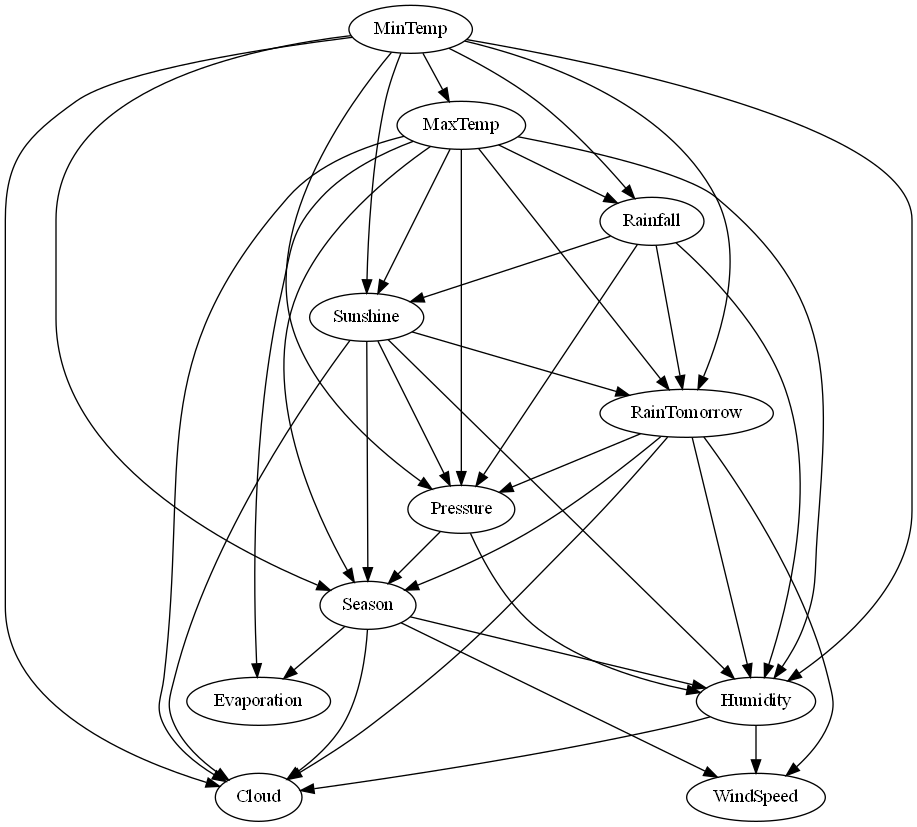

In [106]:
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1_3)).create_png()))

In [108]:
edges = list(est_model1_3.edges)

In [109]:
model16 = BayesianNetwork(edges)

In [110]:
from pgmpy.estimators import BayesianEstimator
model16.fit(X_train_1, estimator=BayesianEstimator, prior_type="BDeu")

In [115]:
def find_value_1(posterior_p):
    klo = str(posterior_p)
    aoo = []
    check = ['-','+','_','=','|',' ','\n']
    st = ''
    pos = 0
    for mk in klo:
        if(mk not in check):
            st += mk
            pos = 1
        elif(pos ==1): 
            #if(type(st)==type(1)):
            aoo.append(st) 
            st = ''
            pos = 0
    return aoo[5]

In [127]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model1)
posterior_p = infer.query(['RainTomorrow'], evidence={'MaxTemp':1,'MinTemp':1})
print(posterior_p)
print(find_value_1(posterior_p))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------------+---------------------+
| RainTomorrow    |   phi(RainTomorrow) |
+=================+=====================+
| RainTomorrow(1) |              0.6358 |
+-----------------+---------------------+
| RainTomorrow(2) |              0.3642 |
+-----------------+---------------------+
0.3642


In [120]:
pickle.dump(infer, open('model_with_small_ver_auto.pkl', 'wb'))

# Model - 3

In [6]:
import pandas as pd
df = pd.read_csv(r"pgm_pro_with_dir_season.csv")  # replace ??? with appropriate params
df.drop('Unnamed: 0.1',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGustDir',
       'Season'],
      dtype='object')

In [7]:
df.shape

(142193, 20)

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test= train_test_split(
    df, test_size=0.25, random_state=0)

In [84]:
X_train.shape

(106644, 20)

In [85]:
X_test.shape

(35549, 20)

In [97]:

from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
hc1 = HillClimbSearch(X_train, K2Score(X_train))
est_model1 = hc1.estimate()


  0%|          | 0/1000000 [00:00<?, ?it/s]

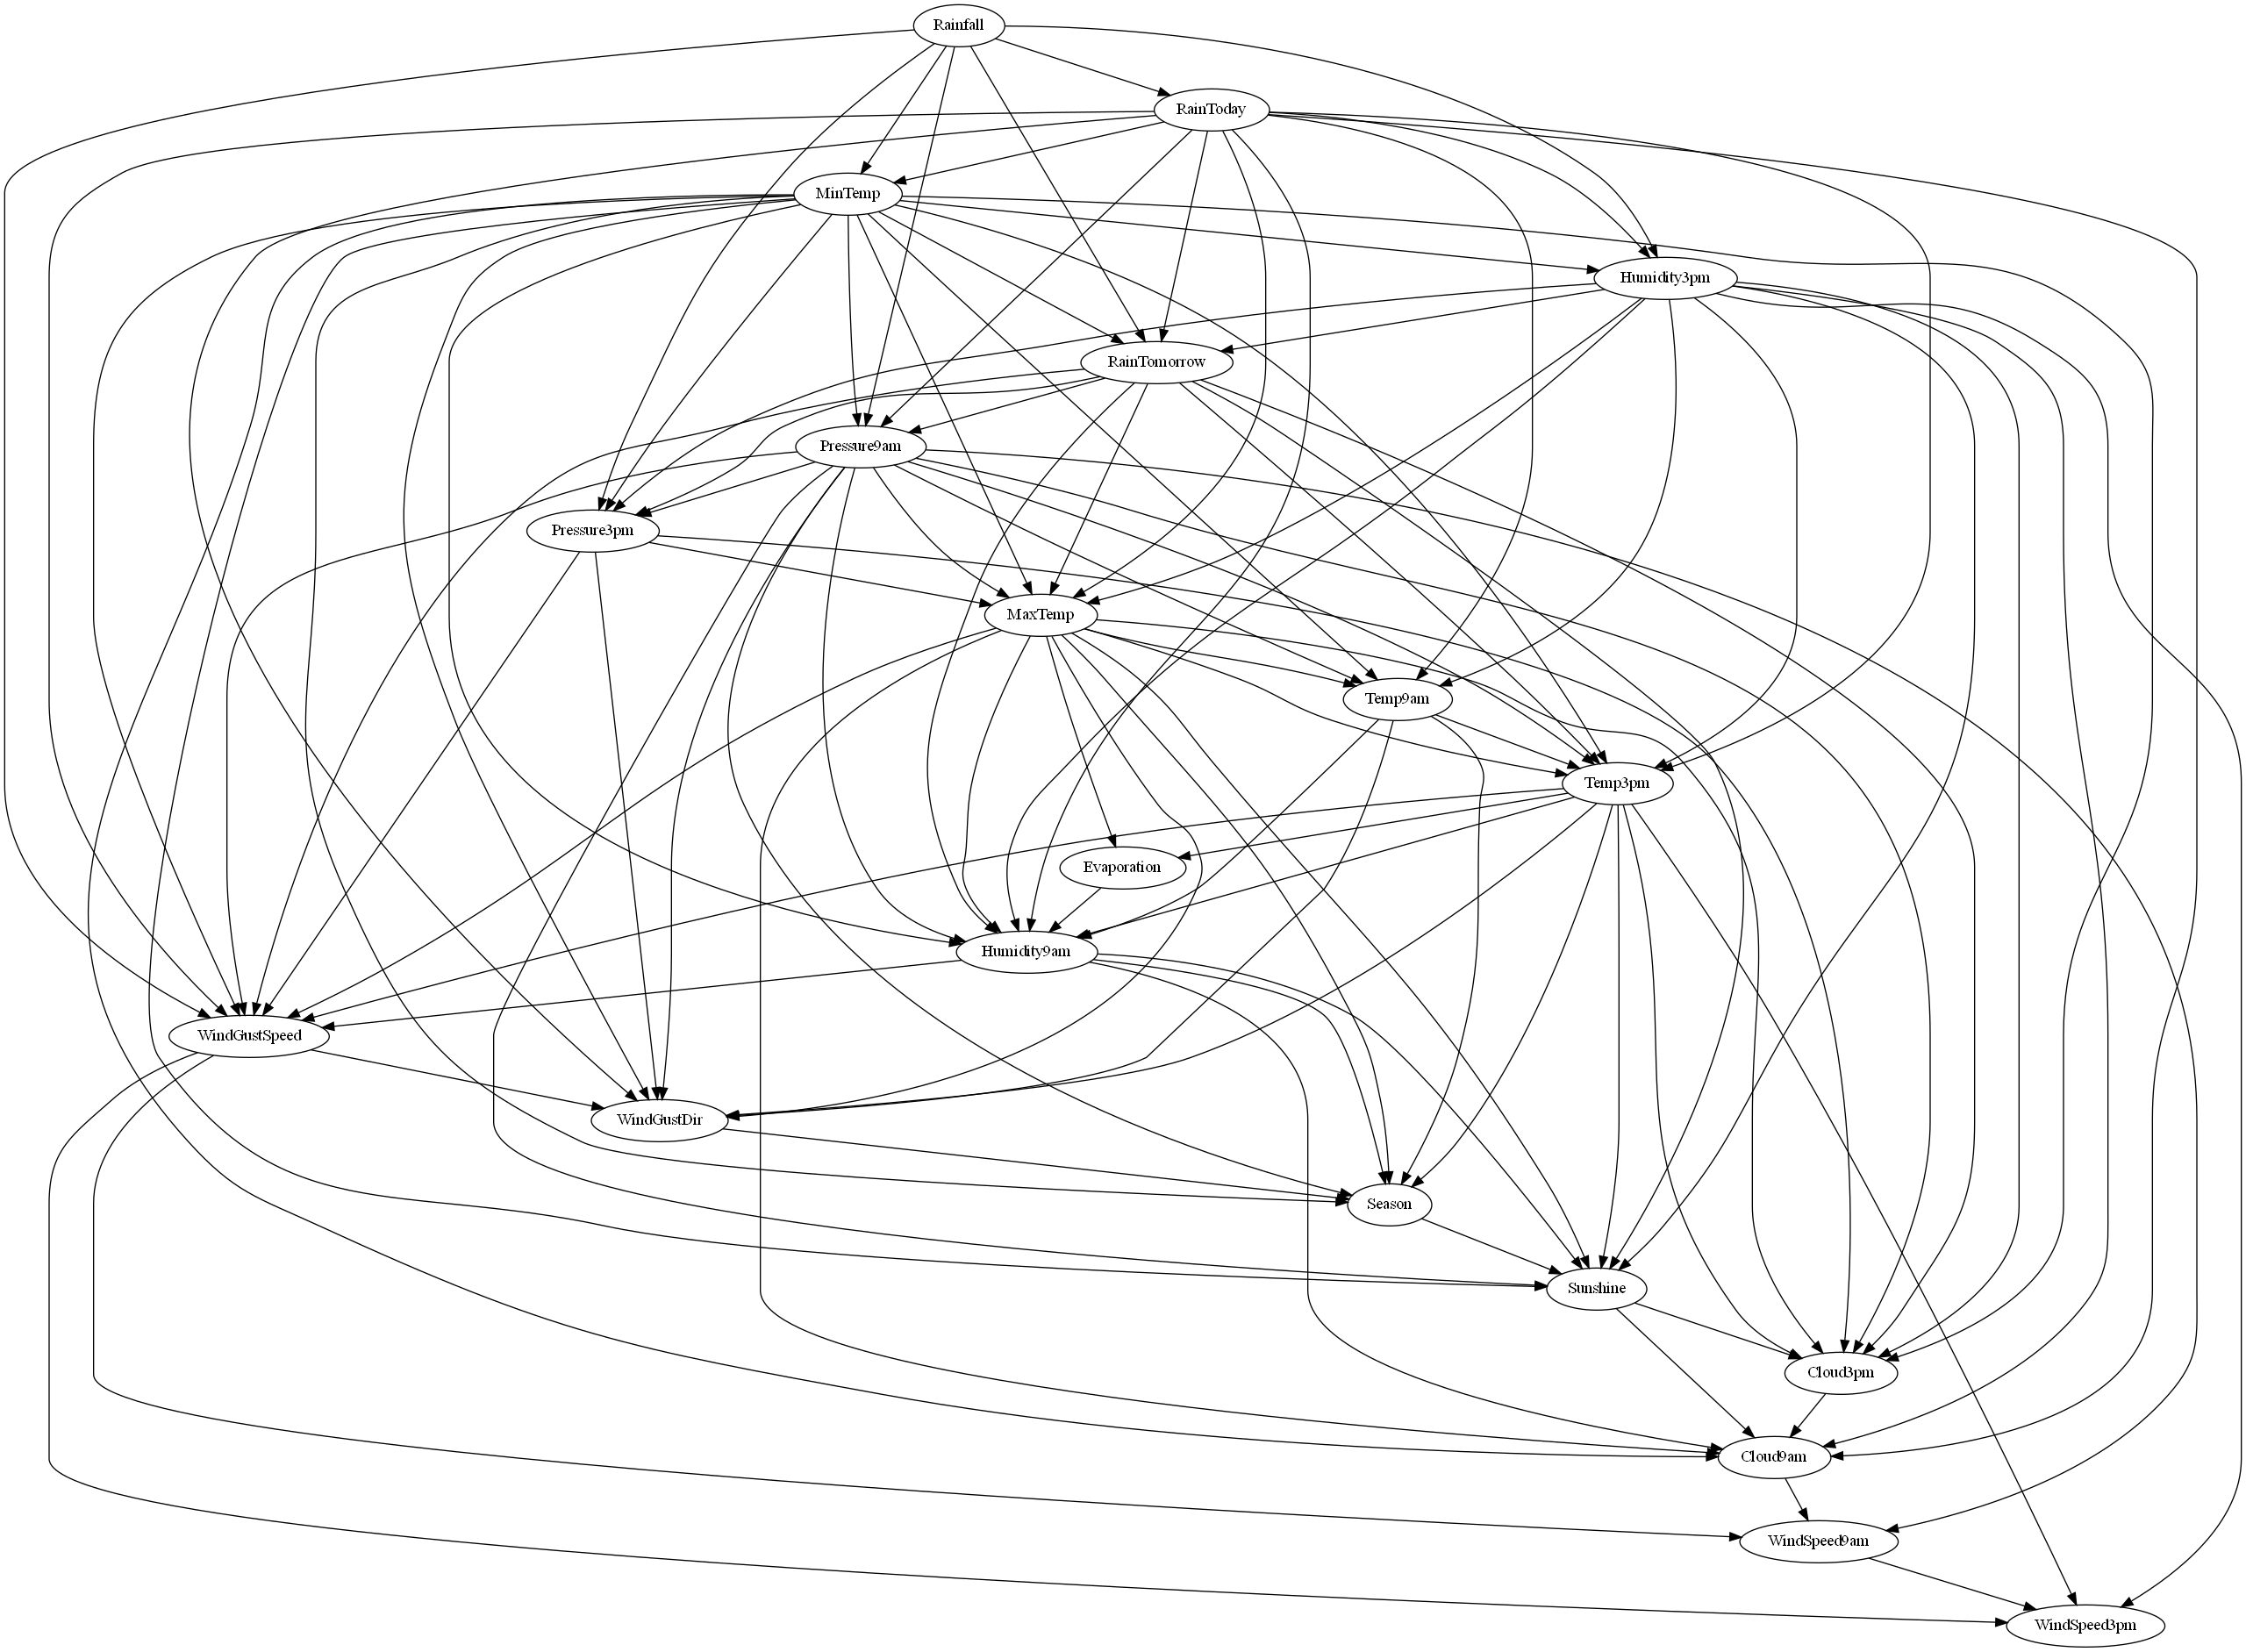

In [44]:
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1)).create_png()))

In [54]:
edges = list(est_model1.edges)

In [55]:
model1 = BayesianNetwork(edges)

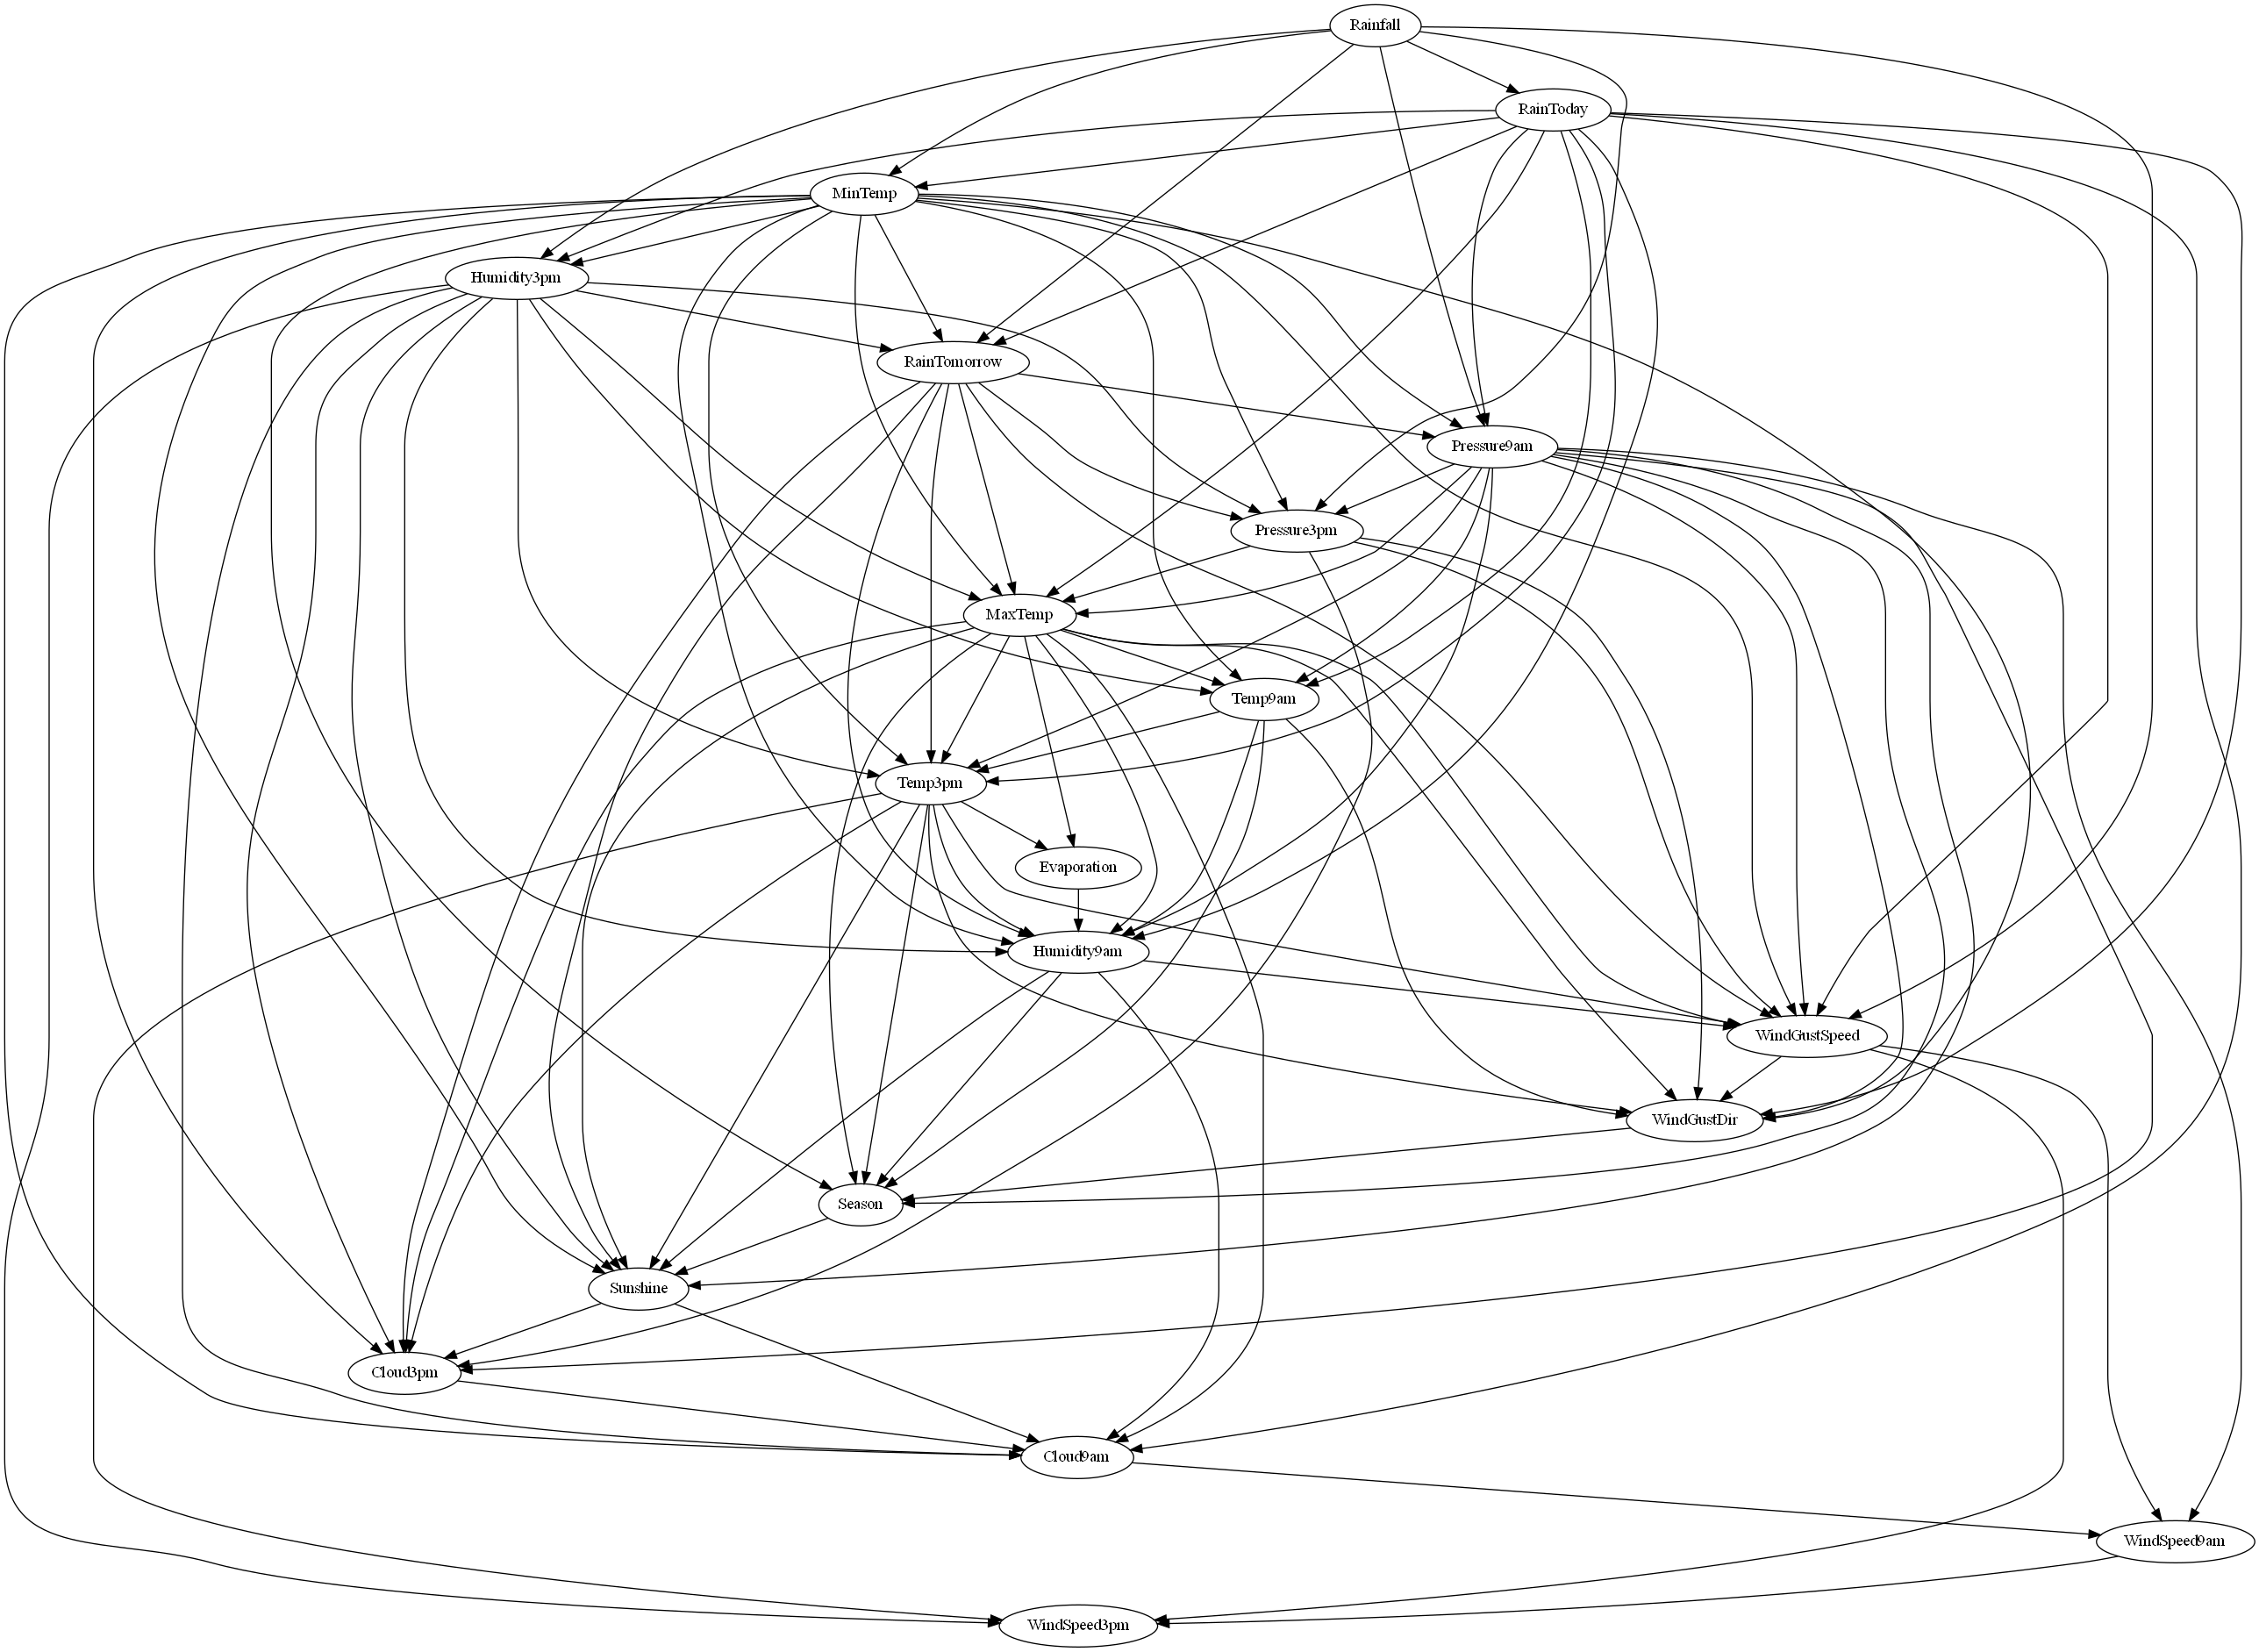

In [56]:
display(Image((nx.drawing.nx_pydot.to_pydot(model1)).create_png()))

In [57]:
from pgmpy.estimators import BayesianEstimator
model1.fit(X_train, estimator=BayesianEstimator, prior_type="BDeu")

In [58]:
def find_value_1(posterior_p):
    klo = str(posterior_p)
    aoo = []
    check = ['-','+','_','=','|',' ','\n']
    st = ''
    pos = 0
    for mk in klo:
        if(mk not in check):
            st += mk
            pos = 1
        elif(pos ==1): 
            #if(type(st)==type(1)):
            aoo.append(st) 
            st = ''
            pos = 0
    return aoo[3]

In [59]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model1)
posterior_p = infer.query(['RainTomorrow'], evidence={'Evaporation':1,'WindGustSpeed':1})
print(posterior_p)
print(find_value_1(posterior_p))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+-----------------+---------------------+
| RainTomorrow    |   phi(RainTomorrow) |
+=================+=====================+
| RainTomorrow(1) |              0.8342 |
+-----------------+---------------------+
| RainTomorrow(2) |              0.1658 |
+-----------------+---------------------+
0.8342


In [60]:
import pickle

In [61]:
#pickle.dump(model1, open('model_tesed_1.pkl', 'wb'))

In [87]:
pickle.dump(infer, open('model_with_var_wlli_1.pkl', 'wb'))

In [90]:
pickle.dump(X_test, open('X_test.pkl', 'wb'))